In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
import re
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']


In [3]:
converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

# Apply to the 'Home' column
converted_recent_df['Home'] = converted_recent_df['Home'].apply(insert_space)
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Brightonand Hove Albion', 'Brighton')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Manchester United', 'Manchester Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Newcastle United', 'Newcastle Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Nottingham Forest', "Nott'ham Forest")
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Sheffield United', 'Sheffield Utd')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Tottenham Hotspur', 'Tottenham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('West Ham United', 'West Ham')
converted_recent_df['Home'] = converted_recent_df['Home'].replace('Wolverhampton Wanderers', 'Wolves')

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)

In [4]:
set(converted_recent_df['Home'])

{'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Liverpool',
 'Luton Town',
 'Manchester City',
 'Manchester Utd',
 'Newcastle Utd',
 "Nott'ham Forest",
 'Sheffield Utd',
 'Tottenham',
 'West Ham',
 'Wolves'}

In [5]:
seasons_df[seasons_df['Season_End_Year'] == 2024]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
12026,2024,1,2023-08-14,Manchester Utd,1,0,Wolves,H
12027,2024,1,2023-08-12,Arsenal,2,1,Nott'ham Forest,H
12028,2024,1,2023-08-12,Sheffield Utd,0,1,Crystal Palace,A
12029,2024,1,2023-08-11,Burnley,0,3,Manchester City,A
12030,2024,1,2023-08-13,Chelsea,1,1,Liverpool,D
...,...,...,...,...,...,...,...,...
12401,2024,38,2024-05-19,Liverpool,2,0,Wolves,H
12402,2024,38,2024-05-19,Arsenal,2,1,Everton,H
12403,2024,38,2024-05-19,Manchester City,3,1,West Ham,H
12404,2024,38,2024-05-19,Burnley,1,2,Nott'ham Forest,A


In [6]:
full_strength_dict, full_parameters, full_acceptance_counters, full_tracked_parameters, full_strength_dict_original, full_parameters_original = (
mcmc(seasons_df, 2013, 2024, burn_in = 30000, iterations = 50000))

In [7]:
full_acceptance_counters

{'Strength': {'accepted': 19942, 'total': 30228},
 'Home Advantage': {'accepted': 0, 'total': 5025, 'percentage': 0.0},
 'Away Advantage': {'accepted': 0, 'total': 4921, 'percentage': 0.0},
 'Mu_P': {'accepted': 0, 'total': 4943, 'percentage': 0.0},
 'Sigma_P': {'accepted': 0, 'total': 4943, 'percentage': 0.0},
 'Eta': {'accepted': 0, 'total': 4883, 'percentage': 0.0},
 'Sigma_S': {'accepted': 0, 'total': 4883, 'percentage': 0.0}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


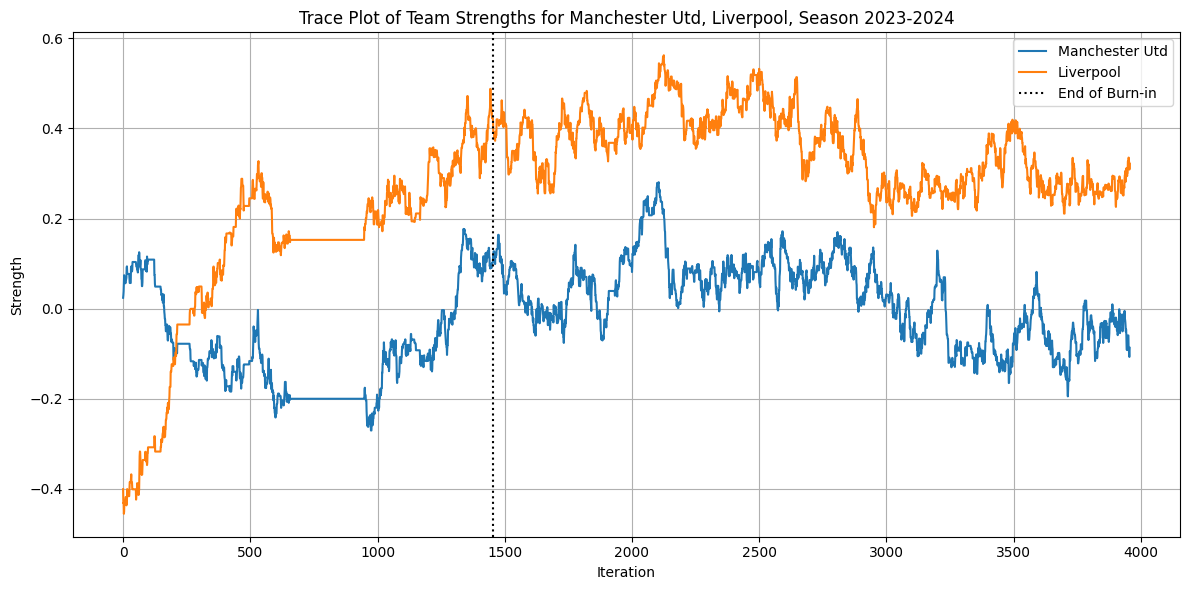

In [8]:
trace_plot_strength_with_burnin(full_strength_dict, full_strength_dict_original, ['Manchester Utd', 'Liverpool'], 2024)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


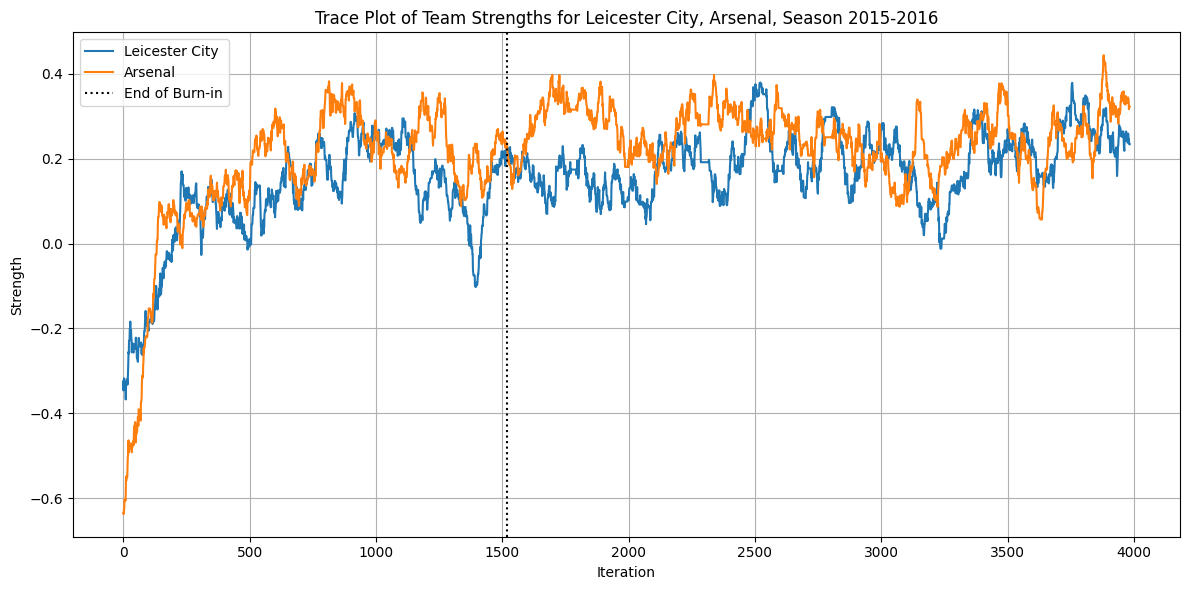

In [9]:
trace_plot_strength_with_burnin(full_strength_dict, full_strength_dict_original, ['Leicester City', 'Arsenal'], 2016)

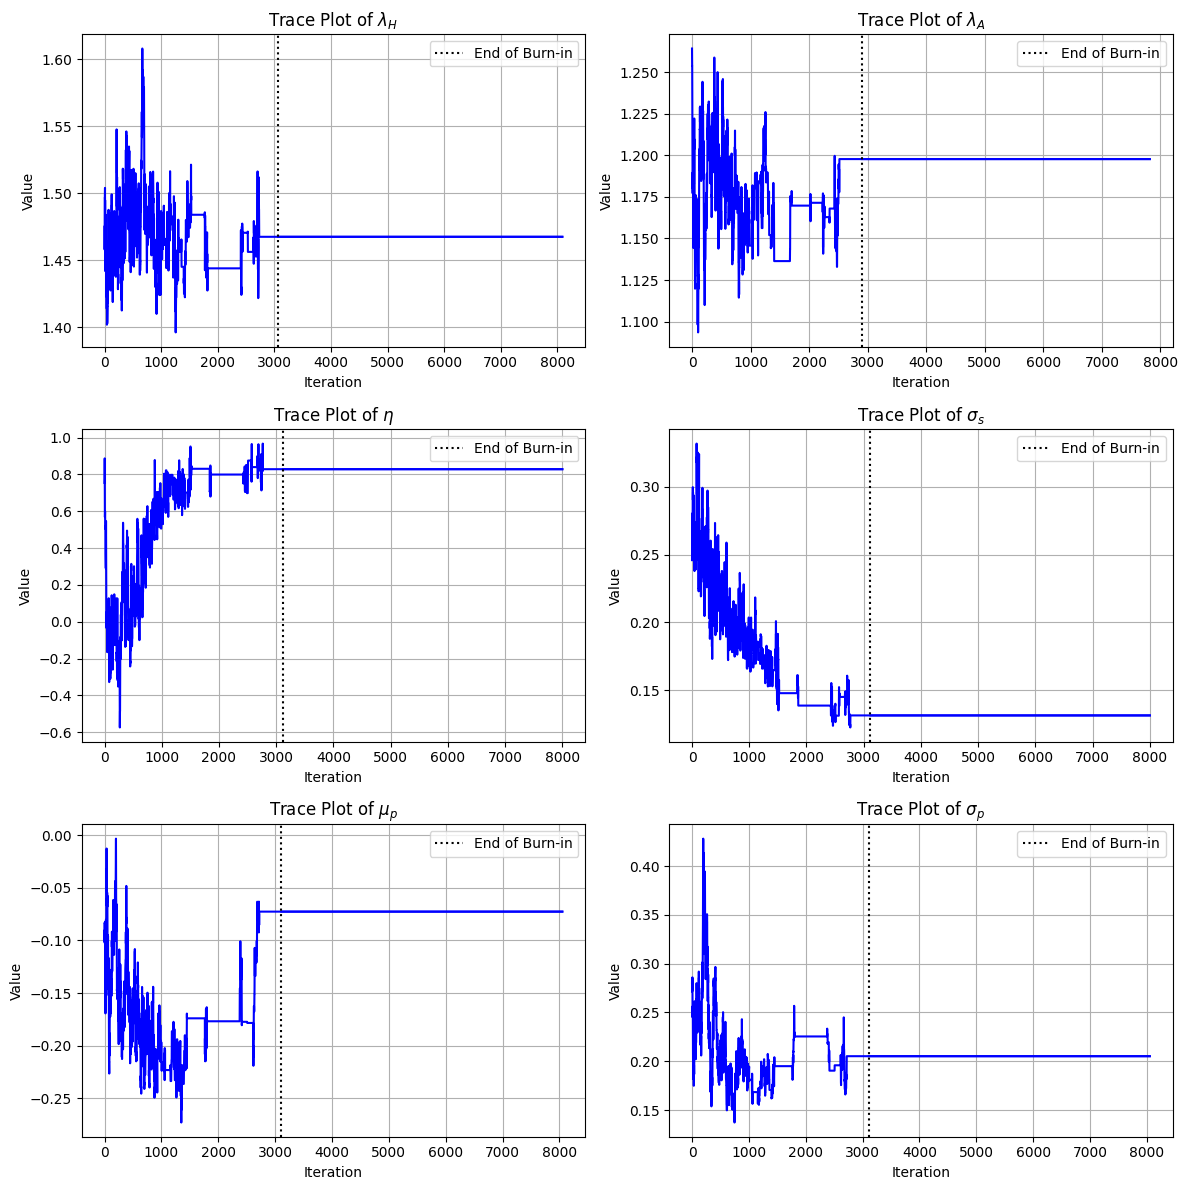

In [10]:
trace_plot_parameter_with_burnin(full_parameters, full_parameters_original)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


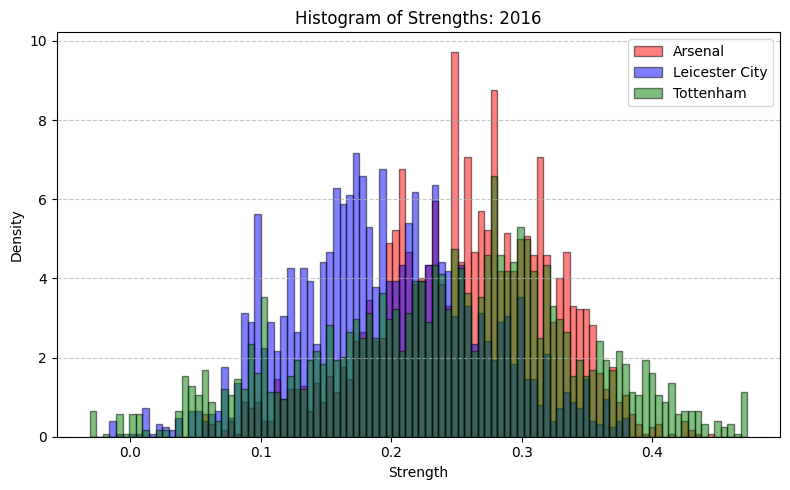

In [11]:
strength_histogram(full_strength_dict, ['Arsenal', 'Leicester City', 'Tottenham'], 2016, colours = ['Red', 'Blue', 'Green'], bins = 100)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:717: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Arsenal's strength was greater than Leicester City's strength in 71.99027158492096% of the iterations


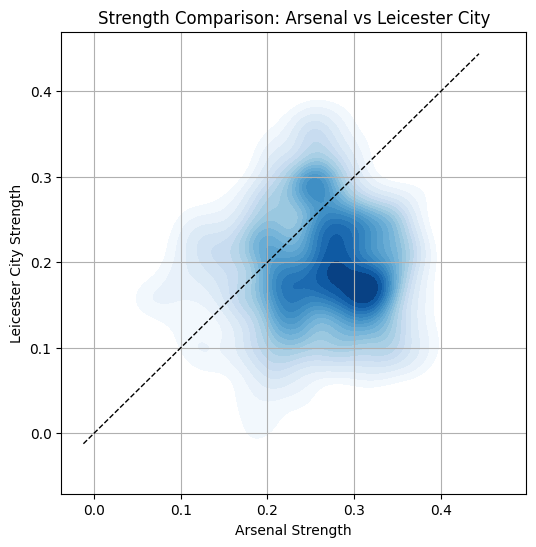

In [12]:
comparison_plot(full_strength_dict, 'Arsenal', 'Leicester City', 2016)

Effective Sample Size for Manchester Utd: 18.99 out of 2537


/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:715: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


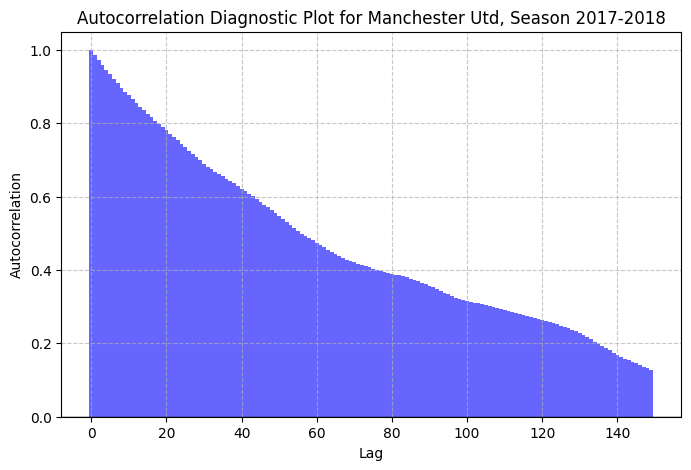

[np.float64(1.0),
 np.float64(0.986714026878039),
 np.float64(0.9734749238280314),
 np.float64(0.9601410455369019),
 np.float64(0.9468669662648981),
 np.float64(0.9339302655450731),
 np.float64(0.9215334254670174),
 np.float64(0.9093505078052555),
 np.float64(0.8974939269507174),
 np.float64(0.8865001926796413),
 np.float64(0.8761290755220847),
 np.float64(0.8661614877836074),
 np.float64(0.8563526150204226),
 np.float64(0.8456290338333465),
 np.float64(0.8352914947316026),
 np.float64(0.8255859968783694),
 np.float64(0.8161346186809559),
 np.float64(0.8074202638175204),
 np.float64(0.7985963270323343),
 np.float64(0.7898170213531941),
 np.float64(0.7813228866649827),
 np.float64(0.772402887357436),
 np.float64(0.763314796360489),
 np.float64(0.7540005684256026),
 np.float64(0.7444898462204488),
 np.float64(0.7347330277548229),
 np.float64(0.7250382986132021),
 np.float64(0.7160379235597479),
 np.float64(0.7071519933593683),
 np.float64(0.6990502646965538),
 np.float64(0.69023501899303

In [160]:
autocorrelation_plot(full_strength_dict, 'Manchester Utd', 2018, max_lag = 150)

In [65]:
new_season = seasons_df[seasons_df['Season_End_Year'] == 2017]
sampled_score, league_table, strengths = sample_season(new_season, full_strength_dict, 2016, full_parameters)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:972: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)


In [ ]:
prob_df = simulate_league_outcomes(new_season, full_strength_dict, 2016, full_parameters, num_simulations = 2000, truncate = 8)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:972: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:972: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:972: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fi

In [67]:
prob_df

Final Position,1,2,3,4,5,6,7,8
Team,,,,,,,,
Arsenal,0.1125,0.13,0.1375,0.0875,0.0875,0.0875,0.09,0.0475
Manchester City,0.16,0.1275,0.12,0.115,0.075,0.0775,0.06,0.0425
Tottenham,0.1725,0.0925,0.12,0.1075,0.065,0.0575,0.0525,0.0725
Leicester City,0.09,0.125,0.0625,0.0725,0.1,0.075,0.09,0.065
Southampton,0.1,0.1175,0.095,0.0775,0.0725,0.0475,0.0875,0.0725
Manchester Utd,0.07,0.06,0.0925,0.085,0.07,0.0775,0.09,0.0675
Liverpool,0.0575,0.08,0.0525,0.0725,0.0725,0.085,0.07,0.08
Chelsea,0.07,0.0575,0.0625,0.0575,0.08,0.0825,0.05,0.0975


In [ ]:
print(prob_df.to_latex(escape = False))

Effective Sample Size for Home Advantage: 5.53 out of 4899


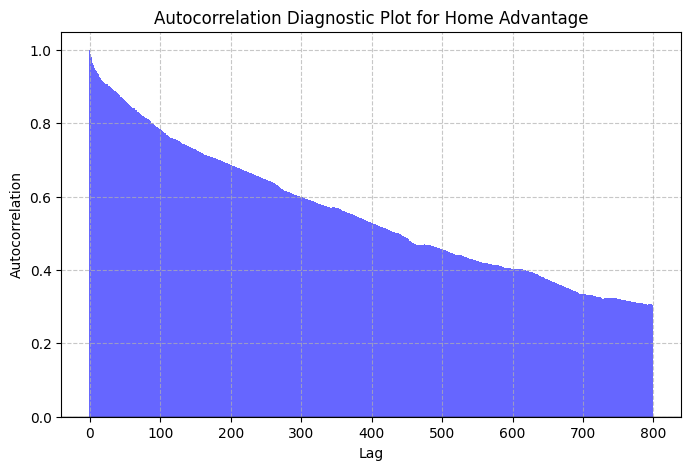

In [163]:
eff_sample_size_parameter(full_parameters, 'Home Advantage', max_lag = 800)

Effective Sample Size for Away Advantage: 8.95 out of 2484


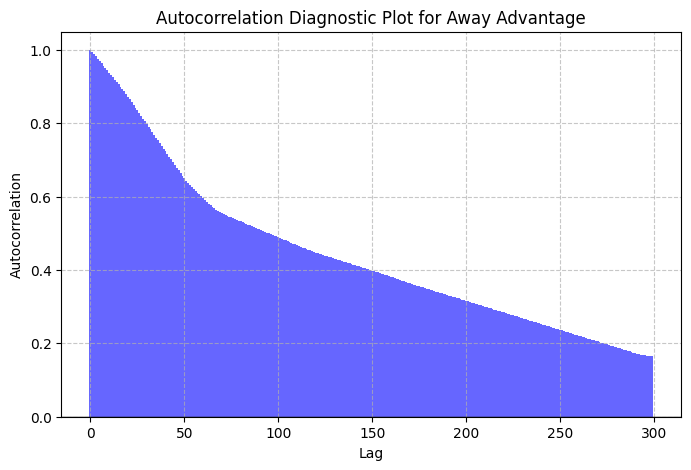

In [129]:
eff_sample_size_parameter(full_parameters, 'Away Advantage', max_lag = 300)

Effective Sample Size for Eta: 5.43 out of 2473


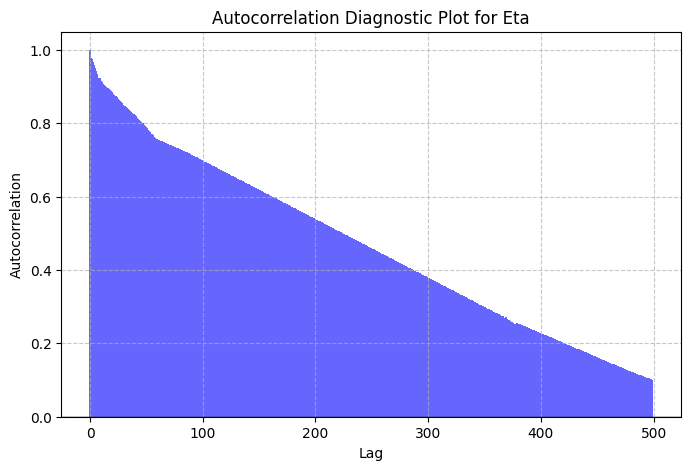

In [140]:
eff_sample_size_parameter(full_parameters, 'Eta', max_lag = 500)

Effective Sample Size for Sigma_S: 9.88 out of 2473


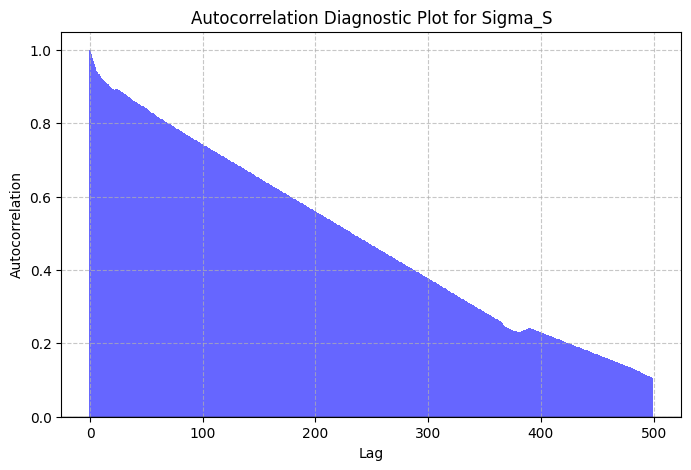

In [139]:
eff_sample_size_parameter(full_parameters, 'Sigma_S', max_lag = 500)

Effective Sample Size for Mu_P: 10.45 out of 2399


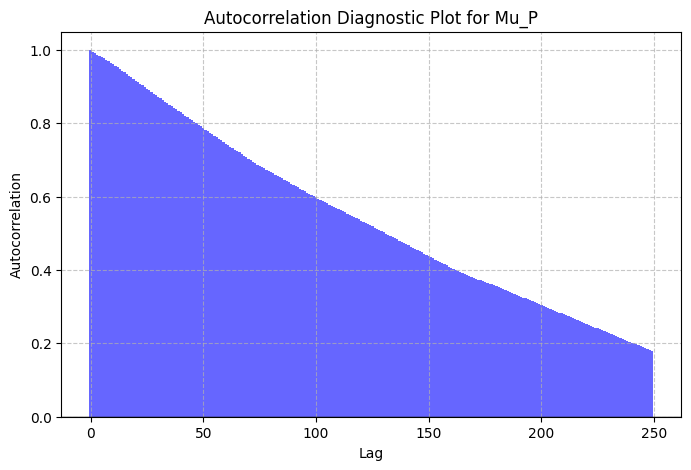

In [141]:
eff_sample_size_parameter(full_parameters, 'Mu_P', max_lag = 250)

Effective Sample Size for Sigma_P: 16.83 out of 2399


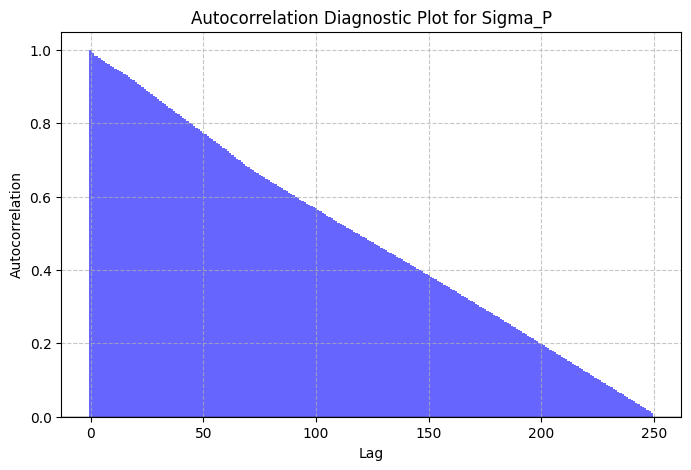

In [143]:
eff_sample_size_parameter(full_parameters, 'Sigma_P', max_lag = 250)